In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [3]:
vocab_size = 1000
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Bangkit/Model/dataset/datasetv3.csv', skiprows=[0])

In [5]:
texts = []
labels = []

In [6]:
for index, row in dataset.iterrows():
  if index == 0:
    continue
  texts.append(row[0])
  labels.append(row[1])

In [7]:
# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to make them of the same length
padded_sequences = pad_sequences(sequences,  maxlen=max_length, padding=padding_type, truncating=trunc_type)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
labels_fix = np.array(labels)

label_binarizer = LabelBinarizer()
labels_fix = label_binarizer.fit_transform(labels_fix)

In [8]:
print(padded_sequences[:5], np.unique(labels_fix))

[[ 60  31 478 669   1 479 670  27  20  23  30  37  28   8  19   8  19  30
   37  28 670  27  20  23   1   1  30  37  28 194 611   1 225 102 984   1
  114 250 114 250 107  38   0   0   0   0   0   0   0   0]
 [  1 671  92 478 307   1 479  31 480 612   1   1   1   1   1   1  67 985
    1   1   1   1 986 308 480   1   1   1 986 308   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 671  92 478 307   1 479  31 612   1   1  67 985 986 308   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [987   1   4  31 478 669   1 479 115  31 478 672   1 262   1 160  14  62
  403 161   1 136 162 195 672 161 309 749   1 673 136 162   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [987   1   4  31 478 669   1 479 115  31 478 672   1 262   1 160  14  62
  403 161   1 136 162 195 672 161 309 749   1 673 136 162   0   0   0   0
    0   0   0   0   0   

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_fix, test_size=0.2, random_state=42)

In [10]:
def create_model(num_words, embedding_dim, maxlen):
    """
    Creates a text classifier model

    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences

    Returns:
        model (tf.keras Model): the text classifier model
    """

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(35, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [11]:
model = create_model(vocab_size, embedding_dim, max_length)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
12/12 [==============================] - 1s 22ms/step - loss: 0.6860 - accuracy: 0.7225 - val_loss: 0.6696 - val_accuracy: 0.8352
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.7473 - val_loss: 0.6383 - val_accuracy: 0.8352
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.7473 - val_loss: 0.6049 - val_accuracy: 0.8352
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.6196 - accuracy: 0.7473 - val_loss: 0.5698 - val_accuracy: 0.8352
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5962 - accuracy: 0.7473 - val_loss: 0.5359 - val_accuracy: 0.8352
Epoch 6/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5782 - accuracy: 0.7473 - val_loss: 0.5042 - val_accuracy: 0.8352
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5595 - accuracy: 0.7473 - val_loss: 0.4853 - val_accuracy: 0.8352
Epoch 8/30
12/12 [=

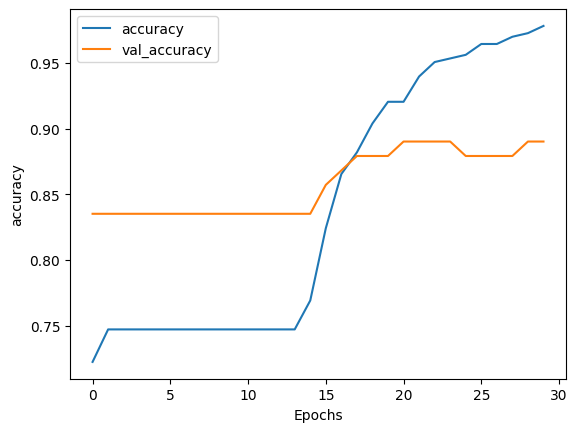

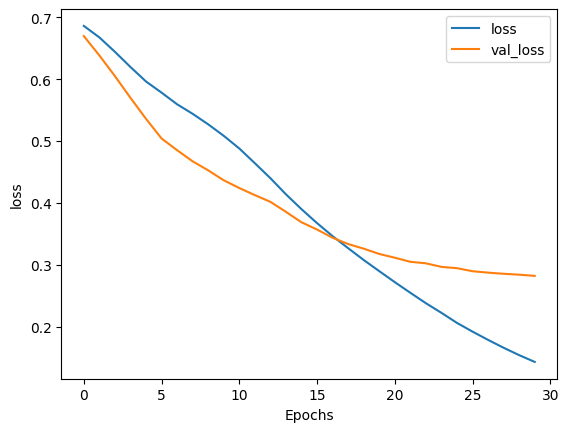

In [12]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
model.save("/content/drive/MyDrive/Bangkit/Model/model/type3/modeltype3documents.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
tokenizer_json = tokenizer.to_json()
with open("/content/drive/MyDrive/Bangkit/Model/model/type3/tokenizerv3.json", "w") as json_file:
    json_file.write(tokenizer_json)

## Making Predictions

In [15]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Bangkit/Model/model/type3/modeltype3documents.h5")

In [16]:
pip install textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [18]:
import textract
from tensorflow.keras.preprocessing.text import Tokenizer
import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences


with open("/content/drive/MyDrive/Bangkit/Model/model/type3/tokenizerv3.json", "r") as json_file:
    loaded_tokenizer_json = json_file.read()

tokenizer = tokenizer_from_json(loaded_tokenizer_json)

file_path = "/content/drive/MyDrive/BERKAS/Visi dan Misi Ketang.docx"
text = textract.process(file_path).decode('utf-8')
words = text.split()[:50]

# Tokenize and pad the input text
sequences = tokenizer.texts_to_sequences([" ".join(words)])
padded_sequence = pad_sequences(sequences, maxlen=50)  # Assuming the same maxlen used during training

# Make predictions
predictions = model.predict(padded_sequence)

# Assuming binary classification (sigmoid activation function in the output layer)
# If it's multiclass, you might need to adjust this part
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
if binary_predictions == 1:
  print('School or Work')
else:
  print('Personal')

print("Raw Predictions:", predictions)
print("Binary Predictions:", binary_predictions)

1/1 [==============================] - 0s 138ms/step
School or Work
Raw Predictions: [[0.91404986]]
Binary Predictions: [[1]]
